Import the necessary libraries.

In [34]:
import numpy as np
import pandas as pd
import stat as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading the data as DataFrame

In [3]:
insuranceData = pd.read_csv("insurance.csv")
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Below Performs the Basic EDA operation:
1: Shape of the Data. Represented in rows,column

In [4]:
insuranceData.shape

(1338, 7)

Above represents that there are 1338 rows and 7 columns in the data frame

2: Information about the data namely the data type of each attribute (column) 

In [5]:
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Above info clearly states that there are non null values but checking it again with isNull method.

3: Below will check for missing values and returns the sum of missing value for each attribute.

In [6]:
insuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Above check states that there are no null values in the whole data.

4: Describe will give the five point summary for the data.

In [7]:
insuranceData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Above gives the five point summary namely : min value,max value, Q1 quartile(25 %), Q2 quartile(50%) and Q3 Quartile(75 %)

5: Below gives the distribution of the bmi, age and charge columns.

In [8]:
bmiData = insuranceData['bmi']
ageData = insuranceData['age']
chargeData = insuranceData['charges']

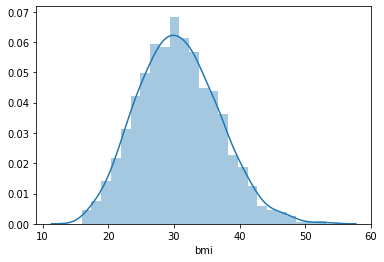

In [9]:
sns.distplot(bmiData)

From the above plot, we can infer that the bmi is normally distributed.

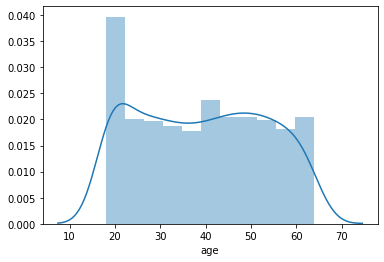

In [10]:
sns.distplot(ageData)

From the above plot, we can infer that age has certain peaks but distribution is not proper.

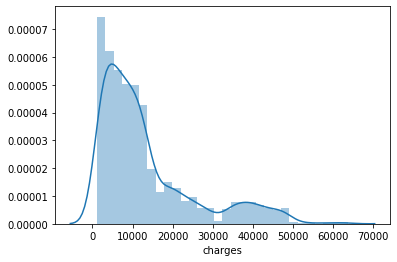

In [11]:
sns.distplot(chargeData)

From the above plot, we can infer that charges is left skewed.

6: Below gives the skewness of the bmi, age and charges.

In [12]:
insuranceData['bmi'].skew()

0.2840471105987448

In [13]:
insuranceData['age'].skew()

0.05567251565299186

In [14]:
insuranceData['charges'].skew()

1.5158796580240388

7: Below box plots give the presence of the outliers in the order of bmi, age and charges. Box Plot is normally recommended when we need to find out the ouliers for a specific attribute.

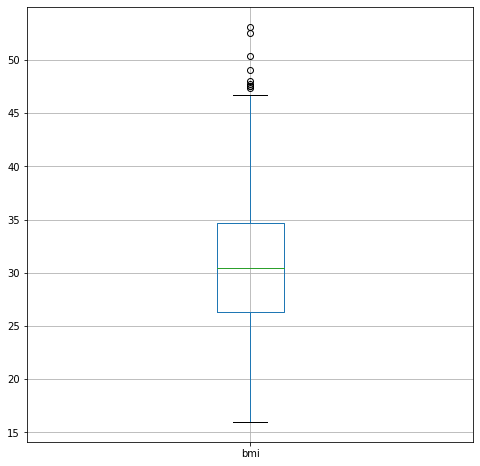

In [15]:
insuranceData.boxplot(column='bmi',return_type='axes',figsize=(8,8))

From the above Box Plot, we can clearly infer that there are outliers for the bmi data.

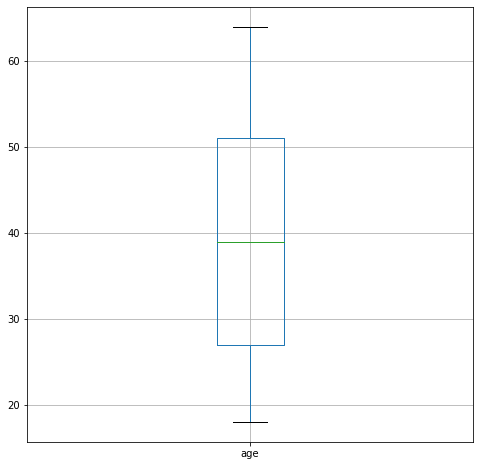

In [16]:
insuranceData.boxplot(column='age',return_type='axes',figsize=(8,8))

From the above box plot we can infer that age has no outliers.

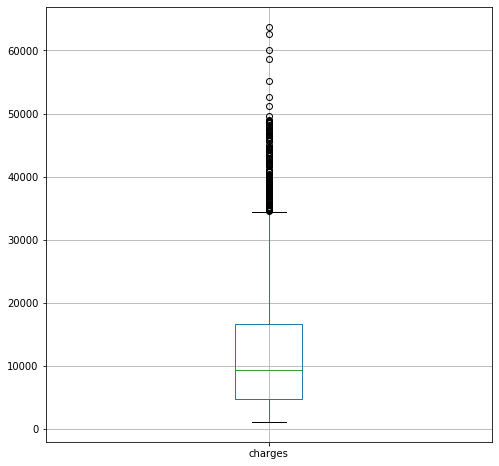

In [17]:
insuranceData.boxplot(column='charges',return_type='axes',figsize=(8,8))

From the above box plot, for the charges, we have a large quantity of outliers.

8: Distribution of categorical data

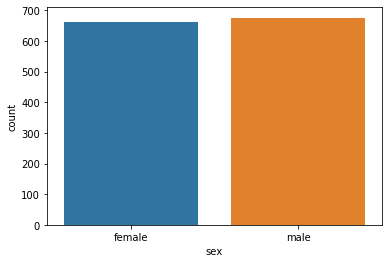

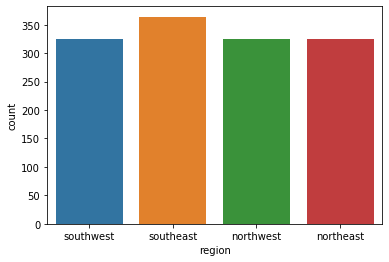

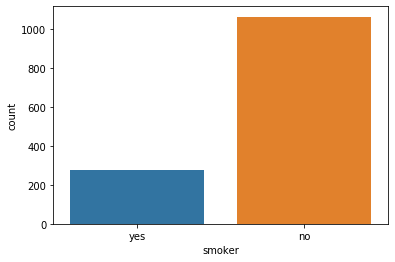

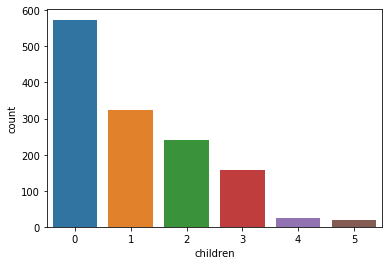

In [20]:
sns.countplot(insuranceData['sex'])
plt.show()

sns.countplot(insuranceData['region'])
plt.show()

sns.countplot(insuranceData['smoker'])
plt.show()

sns.countplot(insuranceData['children'])
plt.show()

Above distribution tells below points:
1: sex attribute is almost balanced.
2: Almost all the regions are balanced with southeast region slightly above the rest.
3: From the 3 graph, we can clearly infer that people who smoke are very less than who don't smoke
4: data tells that count of children is following a decreasing trend.

9: Below gives the pair plots with all the attributes.
One will find the pair plots to be symmetrical by the diagonal.

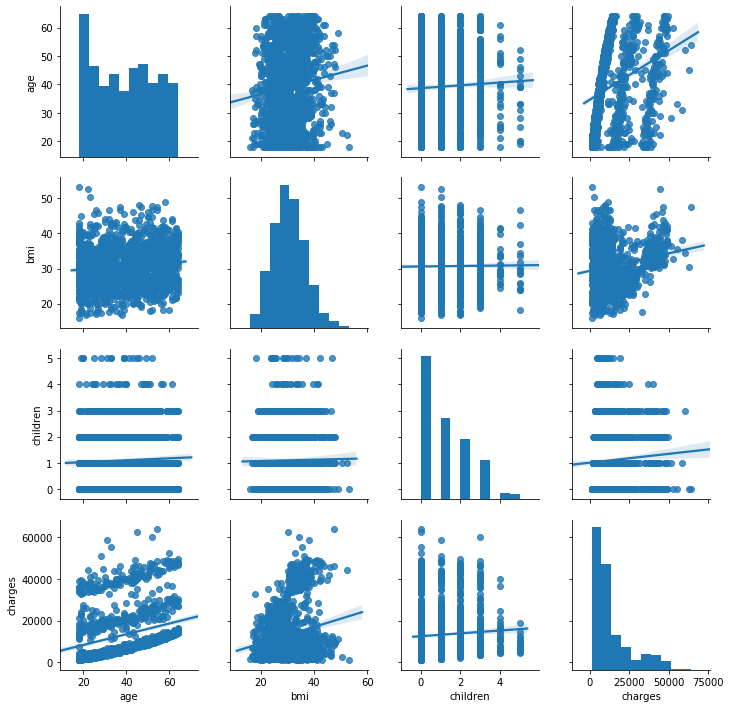

In [19]:
sns.pairplot(insuranceData,kind='reg')

4.a : 
H0 : There is no significant difference between charges variable for people who smoke or doesn't smoke.
Ha : There is a significant difference between charges variable for people who smoke or doesn't smoke

In [37]:
charge_smokers = insuranceData[insuranceData['smoker'] == 'yes']['charges']
charges_nonsmokers = insuranceData[insuranceData['smoker']=='no']['charges']
stat, pval = stats.ttest_ind(charge_smokers, charges_nonsmokers)

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0 the difference is significant. aka |We reject the null|


Since the pval is less than 0.05, then we can say that there is a significant difference. Hence we reject the null hypothesis.

4.b
H0: There is no significant difference between bmi of males and females.
Ha : There is a significant difference between bmi of males and females.

In [40]:
bmi_males = insuranceData[insuranceData['sex'] == 'male']['bmi']
bmi_females = insuranceData[insuranceData['sex'] == 'female']['bmi']

stat, pval = stats.ttest_ind(bmi_males, bmi_females)

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.09 the difference is not significant. aka |We fail to reject the null|


Since the pval is more than 0.05, then we can say that there is no significant difference. 
Hence we fail to reject the null hypothesis.

4.c
H0 : There is no significant difference in the proportion of smokers in different genders
Ha : There is a significant difference in the proportion of smokers in different genders

In [52]:
statistic, p_value = stats.chisquare(insuranceData[insuranceData["smoker"]=="yes"]["sex"].value_counts())

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0079 the difference is significant. aka |We reject the null|


4.d:
H0: There is no difference across the bmi of women with 0,1 or 2 children. (u1=u2=u3)
Ha : There is a difference across the bmi of women with 0,1 or 2 children. (u1 != u2 != u3)